## IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import imblearn
import seaborn as sns

## DATA LOADING

In [7]:
d=pd.read_csv(r'loan predicttion.csv')
d

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Data Preprocessing 

In [8]:
c=['Education','Dependents','Self_Employed','Property_Area']

In [9]:
d=d.drop(c,axis=1)

In [10]:
d

,Loan_ID,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,Male,Yes,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,Male,Yes,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,Male,Yes,7583,0.0,187.0,360.0,1.0,Y


In [11]:
d=d.iloc[:,1:]
d

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...
609,Female,No,2900,0.0,71.0,360.0,1.0,Y
610,Male,Yes,4106,0.0,40.0,180.0,1.0,Y
611,Male,Yes,8072,240.0,253.0,360.0,1.0,Y
612,Male,Yes,7583,0.0,187.0,360.0,1.0,Y


In [12]:
d=d.dropna(axis=0)

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 1 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             515 non-null    object 
 1   Married            515 non-null    object 
 2   ApplicantIncome    515 non-null    int64  
 3   CoapplicantIncome  515 non-null    float64
 4   LoanAmount         515 non-null    float64
 5   Loan_Amount_Term   515 non-null    float64
 6   Credit_History     515 non-null    float64
 7   Loan_Status        515 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 36.2+ KB


# IMBALANCED HANDLING

In [14]:
from collections import Counter

In [15]:
Counter(d['Loan_Status'])

Counter({'N': 158, 'Y': 357})

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

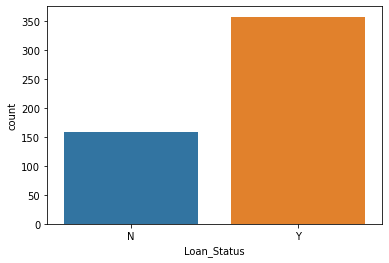

In [16]:
sns.countplot(d['Loan_Status'])

#### AS WE CAN SEE THE TARGET VARIABLE IS IMBALANCED. SO, LETS TRY TO BALANCE IT 

In [17]:
import seaborn as sns

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

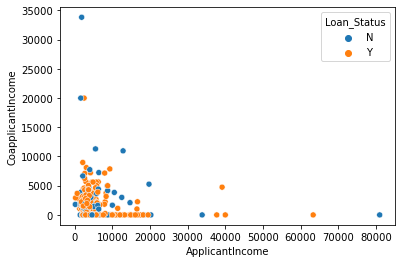

In [18]:
sns.scatterplot(x=d['ApplicantIncome'],y=d['CoapplicantIncome'],hue=d['Loan_Status'])

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

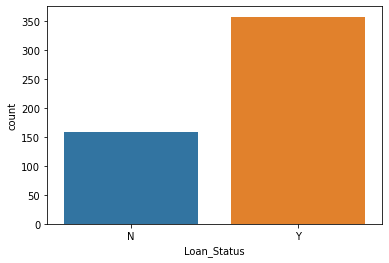

In [19]:
sns.countplot(d['Loan_Status'])

In [20]:
x=d.iloc[:,:-1]
x

,Gender,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,Male,Yes,4583,1508.0,128.0,360.0,1.0
2,Male,Yes,3000,0.0,66.0,360.0,1.0
3,Male,Yes,2583,2358.0,120.0,360.0,1.0
4,Male,No,6000,0.0,141.0,360.0,1.0
5,Male,Yes,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...,...,...
609,Female,No,2900,0.0,71.0,360.0,1.0
610,Male,Yes,4106,0.0,40.0,180.0,1.0
611,Male,Yes,8072,240.0,253.0,360.0,1.0
612,Male,Yes,7583,0.0,187.0,360.0,1.0


In [21]:
y=d['Loan_Status']
y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 515, dtype: object

In [22]:
print(x.shape)
print(y.shape)

(515, 7)
(515,)


# USING OVER SAMPLER

In [23]:
print("BEFORE SAMPLING " , Counter(y))

BEFORE SAMPLING  Counter({'Y': 357, 'N': 158})


In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
major 900

minor 100

9;4.5

major 900

mnor 450


SyntaxError: invalid syntax (1988025071.py, line 1)

In [26]:
ros=RandomOverSampler(random_state=0,sampling_strategy=1)

In [52]:
x_res,y_res = ros.fit_resample(x,y)
x_res.shape

(714, 7)

In [28]:
print("AFTER SAMPLING " , Counter(y_res))

AFTER SAMPLING  Counter({'N': 357, 'Y': 357})


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

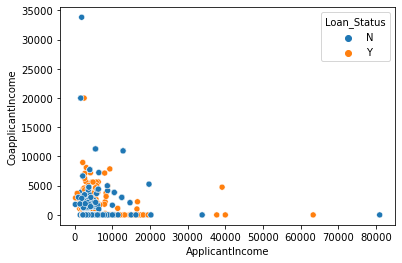

In [29]:
sns.scatterplot(x=x_res['ApplicantIncome'],y=x_res['CoapplicantIncome'],hue=y_res)

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

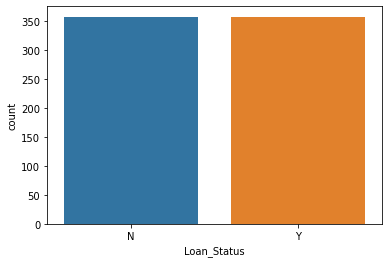

In [30]:
sns.countplot(y_res)

# USING UNDER SAMPLER

In [42]:
major 900

minor 100

1;1 100:100
    
450;100   

SyntaxError: invalid syntax (1913760723.py, line 1)

In [32]:
print("BEFORE SAMPLING " , Counter(y))

BEFORE SAMPLING  Counter({'Y': 357, 'N': 158})


In [33]:
from imblearn.under_sampling import RandomUnderSampler

In [34]:
rus=RandomUnderSampler(random_state=0,sampling_strategy=1)

In [35]:
x_rus,y_rus= rus.fit_resample(x,y)
x_rus.shape

(316, 7)

In [36]:
print("AFTER SAMPLING " , Counter(y_rus))

AFTER SAMPLING  Counter({'N': 158, 'Y': 158})


<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

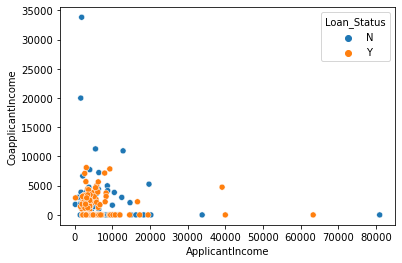

In [37]:
sns.scatterplot(x=x_rus['ApplicantIncome'],y=x_rus['CoapplicantIncome'],hue=y_rus)

C:\Users\Snehal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

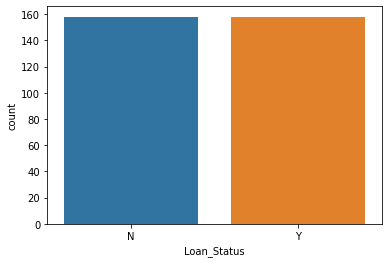

In [38]:
sns.countplot(y_rus)

## SMOTE -

In [53]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [54]:
x.value_counts()

Gender  Married  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History
Female  No       645              3683.0             113.0       480.0             1.0               1
Male    Yes      4300             2014.0             194.0       360.0             1.0               1
                 3675             242.0              108.0       360.0             1.0               1
                 3597             2157.0             119.0       360.0             0.0               1
                 3593             4266.0             132.0       180.0             0.0               1
                                                                                                    ..
        No       4692             0.0                106.0       360.0             1.0               1
                 4683             1915.0             185.0       360.0             1.0               1
                 4384             1793.0             117.0       360.0        

In [55]:
y.value_counts()

Y    357
N    158
Name: Loan_Status, dtype: int64

In [56]:
x_sm,y_sm=smote.fit_resample(x,y)

ValueError: could not convert string to float: 'Male'